#**Step 1: Download and Import Library**

In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 31.5 MB/s 


In [ ]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_addons as tfa
import plotly.express as px
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.metrics import accuracy_score
tf.random.set_seed(42)
import numpy as np
from numpy.random import seed
seed(42)

#**Step 2: Load Dataset and Data Inspection**

##**Step 2.1: Load dataset**

In [ ]:
df = pd.read_csv('heartdisease.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##**Step 2.2: View Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#**Step 3: Data Visualization**

##**Step 3.1: Check for potential outliers**

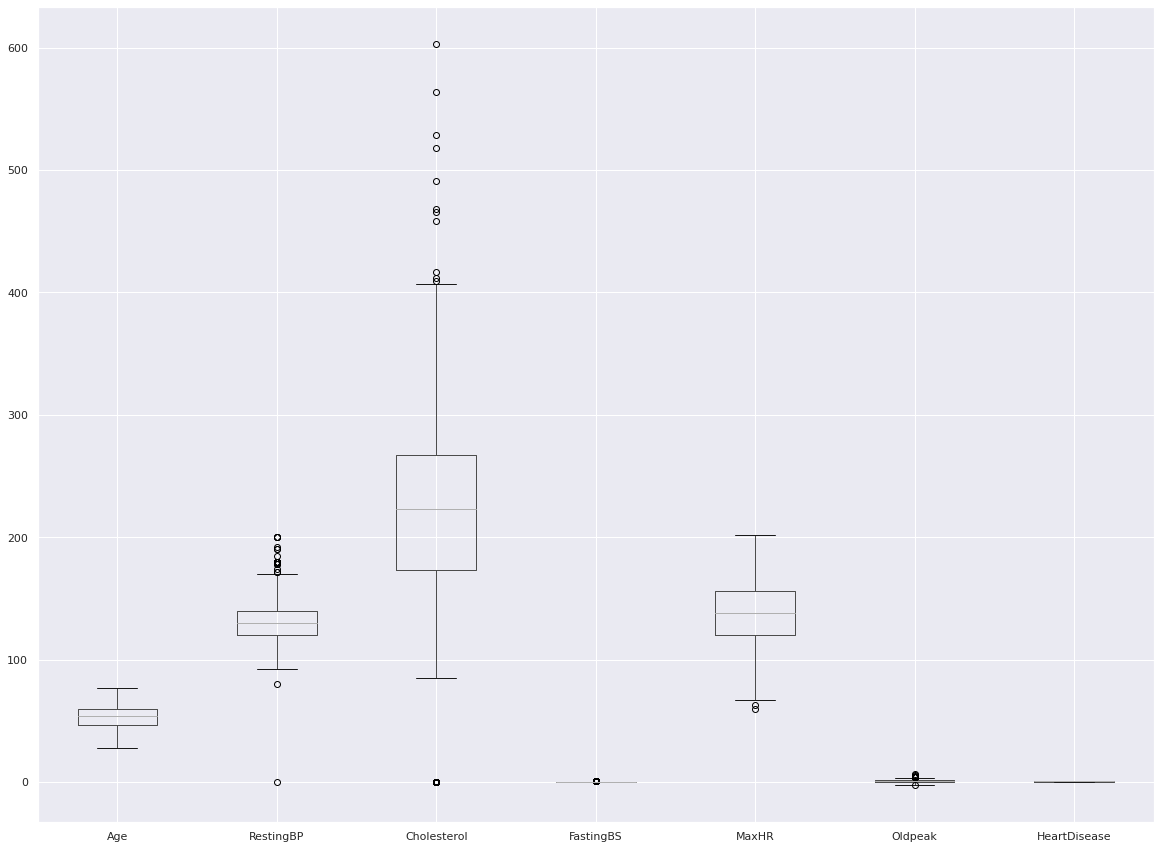

In [ ]:
%matplotlib inline
df.boxplot(figsize=(20, 15))
plt.show()

##**Step 3.2: Show data distribution**

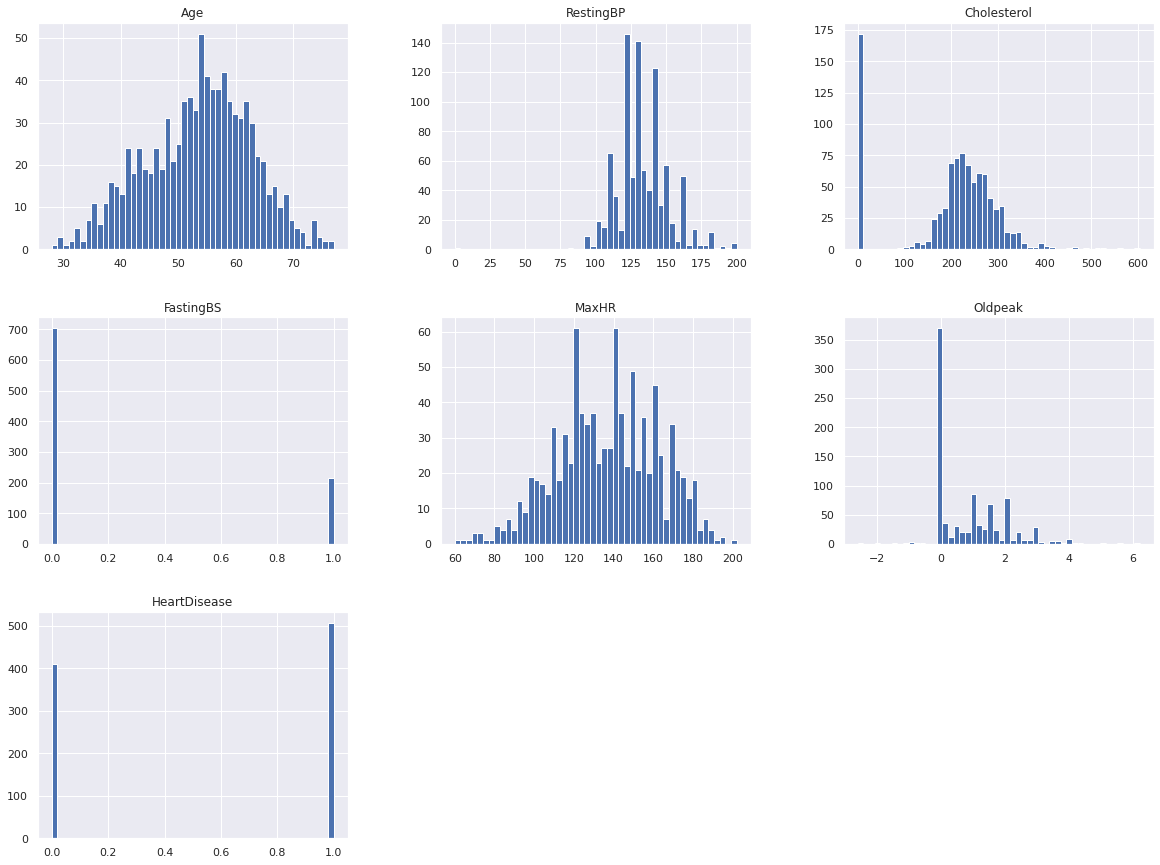

In [ ]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

##**Step 3.3: Visualization and Pivot Tables of Descriptive Analysis**

###**Step 3.3.1 PyPlot Visualization**

In [ ]:
for attribute in list(df.columns):
    fig = px.histogram(df, x=attribute, color=attribute)
    fig.show()

###**Step 3.3.2 Pivot Table**

In [ ]:
def attribute_by_heartdisease(column_name_1, column_name_2='HeartDisease'):
    return df.groupby([column_name_1,column_name_2]).size().unstack(fill_value=0)

def bin_attribute_by_heartdisease(bins, column_name_1, column_name_2='HeartDisease'):
    return df.groupby([pd.cut(df[column_name_1], bins), column_name_2]).size().unstack()

In [ ]:
temp = df[(df.MaxHR <= 150)]
temp.groupby([pd.cut(temp['Age'], [20, 30, 40, 50, 60, 70, 80]), 'HeartDisease']).size().unstack()

HeartDisease,0,1
Age,,
"(20, 30]",0,0
"(30, 40]",19,19
"(40, 50]",59,74
"(50, 60]",93,188
"(60, 70]",34,132
"(70, 80]",7,15


In [ ]:
temp = df[(df.MaxHR > 150)]
temp.groupby([pd.cut(temp['Age'], [20, 30, 40, 50, 60, 70, 80]), 'HeartDisease']).size().unstack()

HeartDisease,0,1
Age,,
"(20, 30]",5,0
"(30, 40]",37,13
"(40, 50]",71,19
"(50, 60]",66,34
"(60, 70]",18,13
"(70, 80]",1,1


In [ ]:
# bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
bin_attribute_by_heartdisease(bins = [20, 30, 40, 50, 60, 70, 80], column_name_1='Age', column_name_2='HeartDisease')

HeartDisease,0,1
Age,,
"(20, 30]",5,0
"(30, 40]",56,32
"(40, 50]",130,93
"(50, 60]",159,222
"(60, 70]",52,145
"(70, 80]",8,16


In [ ]:
bin_attribute_by_heartdisease(bins = [-1, 0, 90, 120, 200], column_name_1='RestingBP', column_name_2='HeartDisease')

HeartDisease,0,1
RestingBP,,
"(-1, 0]",0,1
"(0, 90]",1,0
"(90, 120]",149,142
"(120, 200]",260,365


In [ ]:
bin_attribute_by_heartdisease(bins = [-1, 0, 120, 160, 200, 240, 280, 650], column_name_1='Cholesterol', column_name_2='HeartDisease')

HeartDisease,0,1
Cholesterol,,
"(-1, 0]",20,152
"(0, 120]",2,4
"(120, 160]",14,11
"(160, 200]",75,44
"(200, 240]",135,106
"(240, 280]",92,91
"(280, 650]",72,100


In [ ]:
df[df.Cholesterol.values <= 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
bin_attribute_by_heartdisease(bins = [50, 100, 150, 200, 250], column_name_1='MaxHR', column_name_2='HeartDisease')

HeartDisease,0,1
MaxHR,,
"(50, 100]",18,67
"(100, 150]",194,361
"(150, 200]",197,80
"(200, 250]",1,0


In [ ]:
bin_attribute_by_heartdisease(bins = [-3.0, -2.0, -1.0, 0, 1, 2, 3, 4, 5, 6, 7], column_name_1='Oldpeak', column_name_2='HeartDisease')

HeartDisease,0,1
Oldpeak,,
"(-3.0, -2.0]",0,2
"(-2.0, -1.0]",1,3
"(-1.0, 0.0]",247,128
"(0.0, 1.0]",98,106
"(1.0, 2.0]",55,178
"(2.0, 3.0]",7,65
"(3.0, 4.0]",1,21
"(4.0, 5.0]",1,3
"(5.0, 6.0]",0,1


In [ ]:
attribute_by_heartdisease('Sex')

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


In [ ]:
attribute_by_heartdisease('FastingBS')

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


In [ ]:
attribute_by_heartdisease('ChestPainType')

HeartDisease,0,1
ChestPainType,,
ASY,104,392
ATA,149,24
NAP,131,72
TA,26,20


In [ ]:
attribute_by_heartdisease('RestingECG')

HeartDisease,0,1
RestingECG,,
LVH,82,106
Normal,267,285
ST,61,117


In [ ]:
attribute_by_heartdisease('ExerciseAngina')

HeartDisease,0,1
ExerciseAngina,,
N,355,192
Y,55,316


In [ ]:
attribute_by_heartdisease('ST_Slope')

HeartDisease,0,1
ST_Slope,,
Down,14,49
Flat,79,381
Up,317,78


In [ ]:
for attribute in list(df.columns):
    print(attribute_by_heartdisease(attribute))

HeartDisease   0   1
Age                 
28             1   0
29             3   0
30             1   0
31             1   1
32             3   2
33             1   1
34             5   2
35             7   4
36             4   2
37            10   1
38             5  11
39            13   2
40             7   6
41            18   6
42            15   3
43            13  11
44            13   6
45            15   3
46            11  13
47             8  11
48            16  15
49            10  11
50            11  14
51            20  15
52            17  19
53            18  15
54            28  23
55            17  24
56            13  25
57            12  26
58            14  28
59            12  23
60             8  24
61             5  26
62            10  25
63             7  23
64             7  15
65             6  15
66             6   7
67             3  12
68             4   6
69             3  10
70             1   6
71             3   2
72             1   3
73           

In [ ]:
for attribute in list(df.columns):
    # print('Attribute: {}; Unique Values: {}'.format(attribute, len(list(df[attribute].unique()))))
    print('The count for each unique values: ')
    print(df[attribute].value_counts())


The count for each unique values: 
54    51
58    42
55    41
56    38
57    38
52    36
59    35
62    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
46    24
43    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
39    15
67    15
66    13
69    13
40    13
37    11
35    11
68    10
70     7
74     7
34     7
36     6
71     5
32     5
72     4
75     3
29     3
31     2
77     2
33     2
76     2
30     1
73     1
28     1
Name: Age, dtype: int64
The count for each unique values: 
M    725
F    193
Name: Sex, dtype: int64
The count for each unique values: 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
The count for each unique values: 
120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64
The count for each unique values: 
0      172
254     11
223     10
220     10
230      9
      ... 
35

##**Step 3.4: Show attributes correlation (Before Onehot Encoding)**

In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


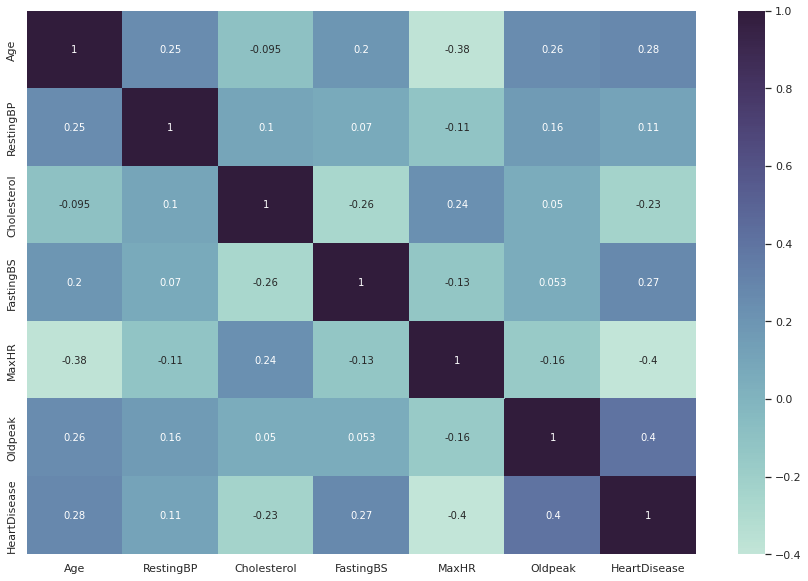

In [ ]:
%matplotlib inline
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True), annot=True)
plt.show()

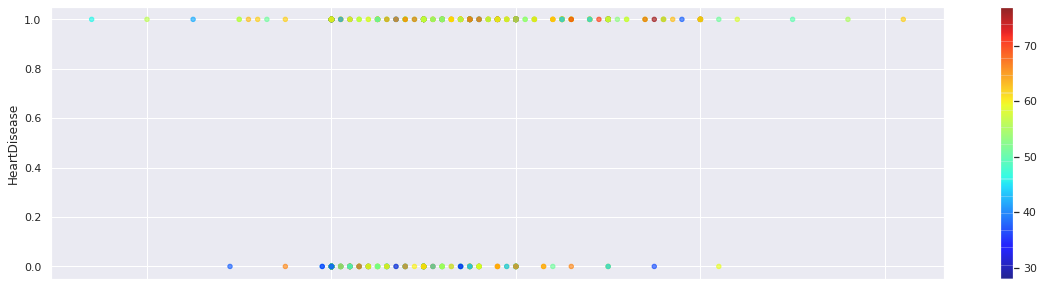

In [ ]:
%matplotlib inline
df.plot(kind='scatter', x='Oldpeak', y='HeartDisease', c=df['Age'], alpha=0.6, figsize=(20, 5), cmap=plt.get_cmap("jet"), colorbar="True")

###**From the scatter plot above, it is observed that most of the patients collected in the dataset has heart disease and their age are around 50 to 60.**

#**Step 4: Data Preparation and Cleaning**

##**Step 4.1: With Pipeline (Option 1)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = df.copy()
X = data.iloc[:,0:11]  #independent columns
y = data.iloc[:,-1]

numerical_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_col = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Numerical PIPELINES
numerical_transformer = Pipeline(
    steps=[('std_scaler', StandardScaler())])

# CATEGORICAL PIPELINE
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# PREPROCESSOR PIPELINE
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_col),
        ("categorical", categorical_transformer, categorical_col),
    ])

# Prepare data
clinical_attributes = preprocessor.fit_transform(X)
print(clinical_attributes.shape)
clinical_attributes

(918, 21)


array([[-1.4331398 ,  0.41090889,  0.82507026, ...,  0.        ,
         0.        ,  1.        ],
       [-0.47848359,  1.49175234, -0.17196105, ...,  0.        ,
         1.        ,  0.        ],
       [-1.75135854, -0.12951283,  0.7701878 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37009972, -0.12951283,  0.34027522, ...,  0.        ,
         1.        ,  0.        ],
       [-1.64528563,  0.30282455, -0.21769643, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
clinical_target = df['HeartDisease'].copy()
clinical_target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

##**Step 4.2: Without Pipeline (Option 2)**

###**Step 4.2.1: Categorical to quantitative representation**

In [ ]:
def create_dummy_values(df_col, prefix, drop_first=False, prefix_sep='_'):
    return pd.get_dummies(df_col, drop_first=drop_first, prefix_sep=prefix_sep, prefix=prefix)

sex_df = create_dummy_values(df['Sex'], prefix='sex')
chestpain_df = create_dummy_values(df['ChestPainType'], prefix='chestpain')
restingecg_df = create_dummy_values(df['RestingECG'], prefix='restecg')
exerciseagina_df = create_dummy_values(df['ExerciseAngina'], prefix='exerciseagina')
stslope_df = create_dummy_values(df['ST_Slope'], prefix='stslope')

# dummied_df = pd.concat([df['Age'], sex_df, chestpain, df['RestingBP'], df['Cholesterol'], df['FastingBS'], restingecg, df['MaxHR'], exerciseagina, df['Oldpeak'], stslope, df['HeartDisease']], axis=1)
# dummied_df.head()
dummied_df = pd.concat([sex_df, chestpain_df, restingecg_df, exerciseagina_df, stslope_df], axis=1)
dummied_df

,sex_F,sex_M,chestpain_ASY,chestpain_ATA,chestpain_NAP,chestpain_TA,restecg_LVH,restecg_Normal,restecg_ST,exerciseagina_N,exerciseagina_Y,stslope_Down,stslope_Flat,stslope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


###**Step 4.2.2: Feature scaling of quantitative variables**

In [ ]:
# data scaling
from mlxtend.preprocessing import standardize
temp_df = df.copy()
temp_df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], inplace=True)
stf_df = standardize(temp_df, columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
std_dummy_df = pd.concat([stf_df, dummied_df, df['FastingBS'], df['HeartDisease']], axis=1)
std_dummy_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,sex_F,sex_M,chestpain_ASY,chestpain_ATA,chestpain_NAP,chestpain_TA,restecg_LVH,restecg_Normal,restecg_ST,exerciseagina_N,exerciseagina_Y,stslope_Down,stslope_Flat,stslope_Up,FastingBS,HeartDisease
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1
914,1.536902,0.627078,-0.053049,0.164684,2.357094,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
916,0.370100,-0.129513,0.340275,1.461525,-0.832432,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1


##**Step 4.3: Visualize features correlation**

In [ ]:
std_dummy_df.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,sex_F,sex_M,chestpain_ASY,chestpain_ATA,chestpain_NAP,chestpain_TA,restecg_LVH,restecg_Normal,restecg_ST,exerciseagina_N,exerciseagina_Y,stslope_Down,stslope_Flat,stslope_Up,FastingBS,HeartDisease
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612,-0.055750,0.055750,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.215793,0.215793,0.138397,0.185568,-0.258067,0.198039,0.282039
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803,-0.005133,0.005133,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.155101,0.155101,-0.007912,0.099207,-0.096146,0.070193,0.107589
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148,0.200092,-0.200092,-0.120531,0.150954,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.034166,-0.034166,-0.083371,-0.050953,0.094027,-0.260974,-0.232741
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691,0.189186,-0.189186,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,0.370425,-0.370425,-0.073316,-0.342581,0.383397,-0.131438,-0.400421
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000,-0.105734,0.105734,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.408752,0.408752,0.322130,0.283295,-0.450577,0.052698,0.403951
sex_F,-0.055750,-0.005133,0.200092,0.189186,-0.105734,1.000000,-1.000000,-0.183876,0.161522,0.066486,0.004031,0.049518,0.010634,-0.063715,0.190664,-0.190664,-0.066036,-0.116077,0.150942,-0.120076,-0.305445
sex_M,0.055750,0.005133,-0.200092,-0.189186,0.105734,-1.000000,1.000000,0.183876,-0.161522,-0.066486,-0.004031,-0.049518,-0.010634,0.063715,-0.190664,0.190664,0.066036,0.116077,-0.150942,0.120076,0.305445
chestpain_ASY,0.166607,0.048824,-0.120531,-0.354963,0.280026,-0.183876,0.183876,1.000000,-0.522432,-0.577670,-0.249003,0.002289,-0.063606,0.076438,-0.430034,0.430034,0.103407,0.303645,-0.359443,0.131176,0.516716
chestpain_ATA,-0.218165,-0.046153,0.150954,0.253735,-0.262124,0.161522,-0.161522,-0.522432,1.000000,-0.256767,-0.110679,-0.085791,0.107941,-0.046111,0.300365,-0.300365,-0.097754,-0.304667,0.357588,-0.140514,-0.401924
chestpain_NAP,-0.011335,-0.041348,-0.006634,0.134580,-0.106212,0.066486,-0.066486,-0.577670,-0.256767,1.000000,-0.122381,0.035299,0.005010,-0.042236,0.166030,-0.166030,-0.040816,-0.072031,0.093583,-0.039249,-0.212964


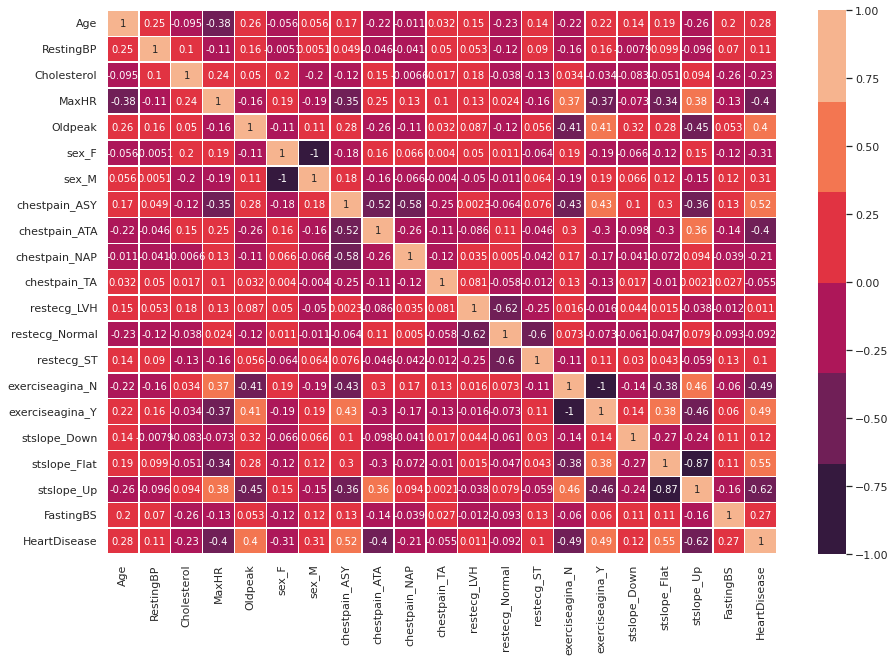

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(std_dummy_df.corr(), cmap=sns.color_palette("rocket"), annot=True, linewidths=.5)
plt.show()

##**Step 4.4: Depict data distribution with boxplot and histogram**

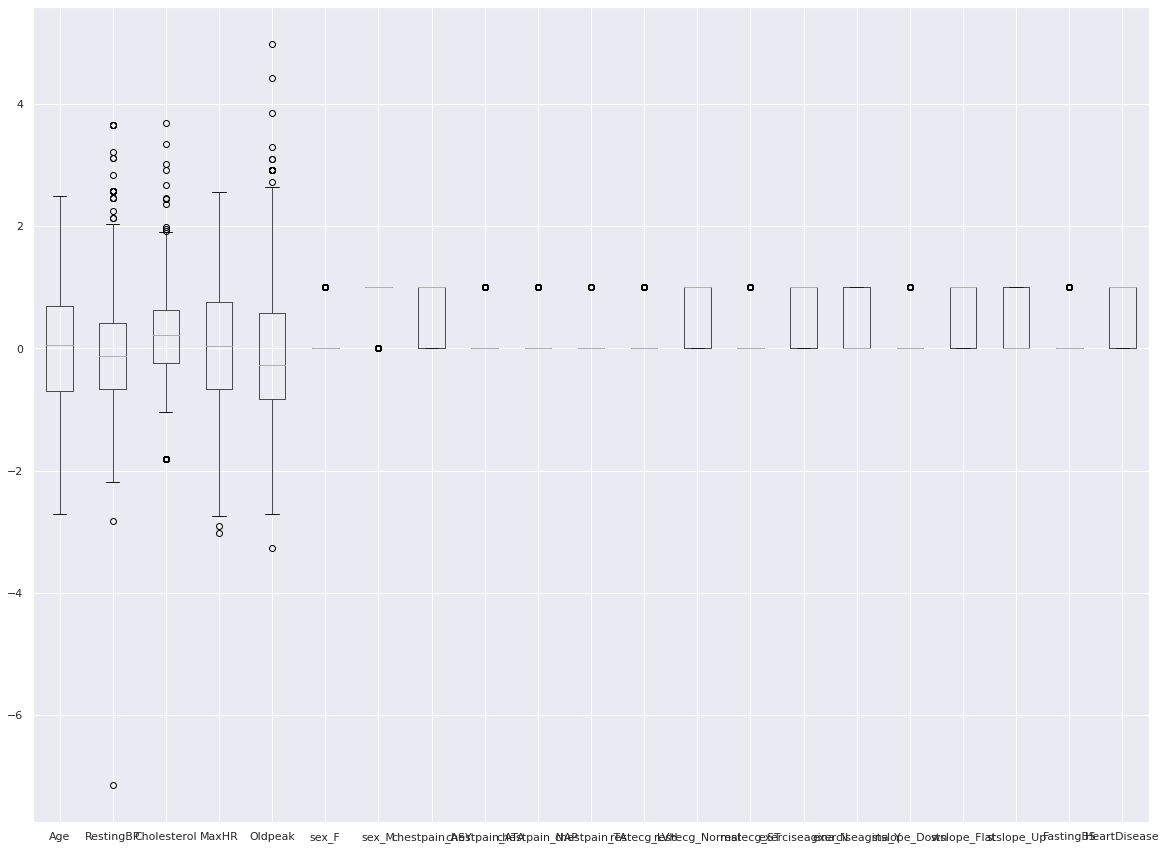

In [ ]:
%matplotlib inline
std_dummy_df.boxplot(figsize=(20, 15))
plt.show()

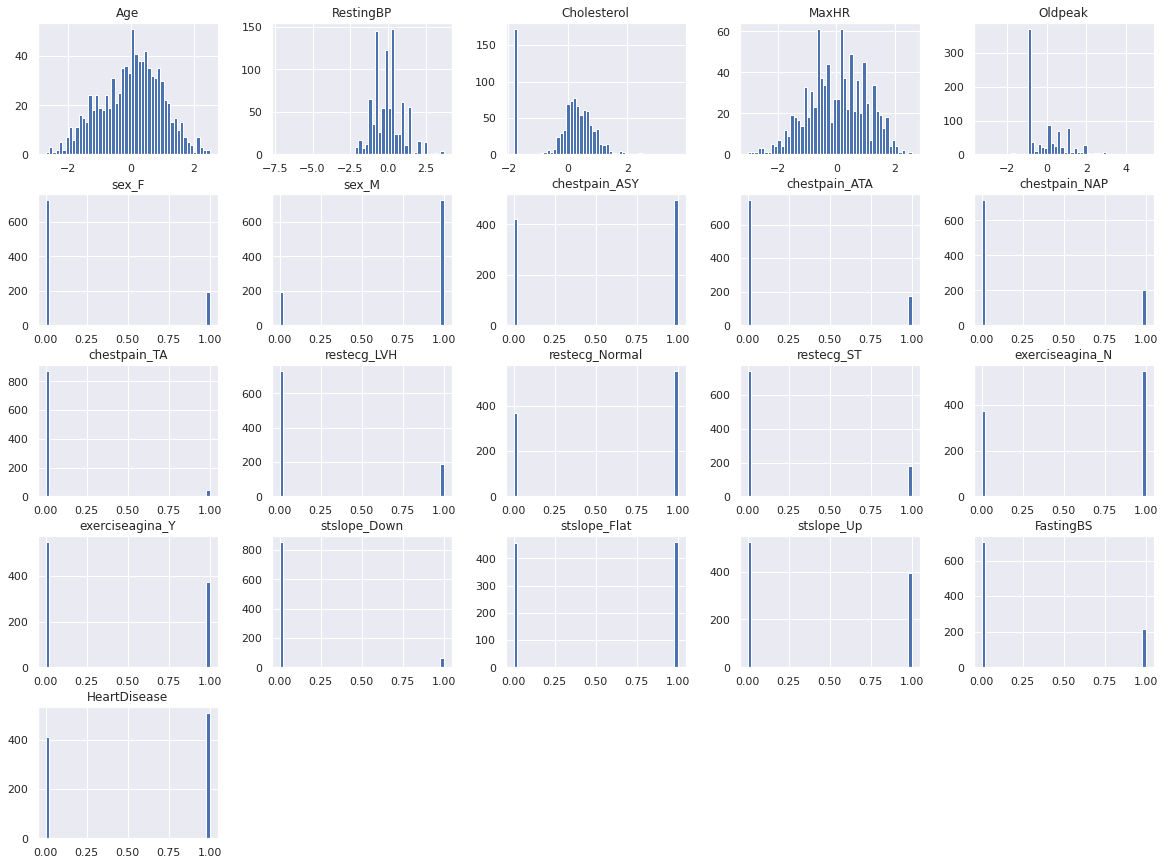

In [ ]:
%matplotlib inline
std_dummy_df.hist(bins=50, figsize=(20,15))
plt.show()

#**Step 5: Data Splitting: Create Train and Test Dataset**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

final_df = std_dummy_df.drop(columns=['HeartDisease'])
split = StratifiedShuffleSplit(n_splits=10, test_size=0.20, random_state=42)
for train_index, test_index in split.split(final_df, std_dummy_df['HeartDisease']):
    strat_train_set = std_dummy_df.loc[train_index]
    strat_test_set = std_dummy_df.loc[test_index]

In [ ]:
X_train = strat_train_set.drop(columns=['HeartDisease'])
Y_train = strat_train_set['HeartDisease']
X_test = strat_test_set.drop(columns=['HeartDisease'])
Y_test = strat_test_set['HeartDisease']

###**Step 5.1: Save to csv file**

In [ ]:
train_data = pd.concat([X_train, Y_train], axis=1)
train_data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,sex_F,sex_M,chestpain_ASY,chestpain_ATA,chestpain_NAP,chestpain_TA,restecg_LVH,restecg_Normal,restecg_ST,exerciseagina_N,exerciseagina_Y,stslope_Down,stslope_Flat,stslope_Up,FastingBS,HeartDisease
562,0.582246,0.410909,0.687864,0.675561,1.043759,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0
386,-1.220994,0.681120,-1.818435,-1.485840,-0.832432,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
400,-0.372411,1.491752,-1.818435,-1.053560,-0.832432,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1
229,-1.751359,-0.129513,-0.235991,1.854507,-0.832432,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0
149,0.051881,-0.129513,3.697252,-0.464087,0.105664,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,-0.478484,-0.129513,-1.818435,0.321877,1.981855,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1
416,1.006537,0.410909,0.559805,-0.974963,1.981855,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1
687,1.749048,1.275584,0.422599,0.243281,-0.832432,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
119,-2.069577,0.410909,-0.391491,1.697314,-0.832432,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1


In [ ]:
train_data.to_csv('ML_MiniProject_TripleDataTeam_Train.csv')

In [ ]:
test_data = pd.concat([X_test, Y_test], axis=1)
test_data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,sex_F,sex_M,chestpain_ASY,chestpain_ATA,chestpain_NAP,chestpain_TA,restecg_LVH,restecg_Normal,restecg_ST,exerciseagina_N,exerciseagina_Y,stslope_Down,stslope_Flat,stslope_Up,FastingBS,HeartDisease
156,-1.645286,-1.210356,-0.080490,0.518368,0.105664,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
318,0.794391,-0.129513,-1.818435,-2.350400,1.512807,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1
200,-0.690629,-1.210356,0.459187,0.518368,-0.832432,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
599,0.264027,-0.129513,0.038422,-1.525138,0.574711,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1
301,0.157954,0.410909,-1.818435,0.518368,-0.644813,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,-0.902775,-1.210356,-1.818435,0.046790,-0.926242,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
866,-1.008848,-0.129513,0.184775,2.011699,-0.832432,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
444,0.264027,-0.669935,-0.903727,-0.660578,0.574711,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1
11,0.476173,0.194740,-0.318314,-1.485840,1.043759,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1


In [ ]:
test_data.to_csv('ML_MiniProject_TripleDataTeam_Test.csv')

##**Step 5.2: Read the saved csv file**

In [ ]:
import pandas as pd
X_train = pd.read_csv('/content/ML_MiniProject_TripleDataTeam_Train.csv', index_col='Unnamed: 0')
Y_train = X_train['HeartDisease']
X_train.drop(columns=['HeartDisease'], inplace=True)
print(X_train.columns)
print(Y_train)
X_test = pd.read_csv('/content/ML_MiniProject_TripleDataTeam_Test.csv', index_col='Unnamed: 0')
Y_test = X_test['HeartDisease']
X_test.drop(columns=['HeartDisease'], inplace=True)
print(X_test.columns)
print(Y_test)

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'sex_F', 'sex_M',
       'chestpain_ASY', 'chestpain_ATA', 'chestpain_NAP', 'chestpain_TA',
       'restecg_LVH', 'restecg_Normal', 'restecg_ST', 'exerciseagina_N',
       'exerciseagina_Y', 'stslope_Down', 'stslope_Flat', 'stslope_Up',
       'FastingBS'],
      dtype='object')
562    0
386    1
400    1
229    0
149    1
      ..
492    1
416    1
687    0
119    1
542    1
Name: HeartDisease, Length: 734, dtype: int64
Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'sex_F', 'sex_M',
       'chestpain_ASY', 'chestpain_ATA', 'chestpain_NAP', 'chestpain_TA',
       'restecg_LVH', 'restecg_Normal', 'restecg_ST', 'exerciseagina_N',
       'exerciseagina_Y', 'stslope_Down', 'stslope_Flat', 'stslope_Up',
       'FastingBS'],
      dtype='object')
156    1
318    1
200    0
599    1
301    0
      ..
326    0
866    0
444    1
11     1
299    1
Name: HeartDisease, Length: 184, dtype: int64


#**Step 6: Create Machine Learning / Deep Learning Model**
2 machine learning models and 1 deep learning model are constructed to classify the risk of having heart disease, namely Logistic Regression, Naive Bayes, Multilayer Perceptron

##**Step 6.1: Deep Learning Model (Multilayer Perceptron, MLP)**

###**Step 6.1.1: Build MLP Model**

In [ ]:
# from tensorflow.python.keras.layers.normalization.batch_normalization import BatchNormalization
def create_mlp(input_dim):
    return tf.keras.Sequential([
                             layers.Dense(16, input_dim=input_dim, activation="relu"),
                            #  layers.BatchNormalization(),
                             layers.Dropout(0.8),
                             layers.Dense(8, activation="relu"),
                            #  layers.Dense(8, kernel_regularizer=tf.keras.regularizers.l1_l2(), activation="relu"),
                             layers.BatchNormalization(),
                             layers.Dense(1, activation='sigmoid')
    ])
# mlpmodel.summary()

###**Step 6.1.2: Define Experiment / Model Training Function**

In [ ]:
learning_rate=0.00025
weight_decay = 0.00025
batch_size = 256
epochs = 500

def run_experiment(model, learning_rate, weight_decay, batch_size, epochs, train_data_x, train_data_y):
    # optimizer = tf.optimizers.Adam(learning_rate=0.0005)
    optimizer = tfa.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)
    loss = tf.keras.losses.BinaryCrossentropy()

    checkpoint_filepath = "/content/chckpt/checkpoint.ckpt"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor="val_loss",
        mode='min',
        save_weights_only=True,
        save_best_only=True,
        # restore_best_weights = True
    )

    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=250, verbose=0,
        mode='min'
    )
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(train_data_x, train_data_y, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.1, callbacks=[checkpoint_callback, early_stop])
    return history

###**Step 6.1.3: MLP with Feature Selector**

In [ ]:
from sklearn.feature_selection import SelectKBest
def select_features(X_train, Y_train, X_test, k):
	# configure to select all features
    fs = SelectKBest(score_func=f_classif, k=k)
	# learn relationship from training data
    fs.fit(X_train, Y_train)
	# transform train input data
    X_train_fs = fs.transform(X_train)
	# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs, k, fs.get_support()

for k_num in range(1, 21):
    X_train_fs, X_test_fs, fs, k, att_names = select_features(X_train, Y_train, X_test, k_num)
    mlpmodel = create_mlp(k_num)
    history = run_experiment(mlpmodel, learning_rate=learning_rate, weight_decay=weight_decay, batch_size=batch_size, epochs=epochs, train_data_x=X_train_fs, train_data_y=Y_train)
    print(mlpmodel.evaluate(X_test_fs, Y_test))
    print('k value: {}'.format(k))
    print(att_names)
    for k, v in enumerate(att_names):
        if v == True:
            print(X_train.columns[k])
    print('Accuracy: %.2f' % (mlpmodel.evaluate(X_test_fs, Y_test)[1]*100))
    print("=-"*50)

6/6 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.5543
[0.6190009713172913, 0.554347813129425]
k value: 1
[False False False False False False False False False False False False
 False False False False False False  True False]
stslope_Up
6/6 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.5543
Accuracy: 55.43
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
6/6 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.8315
[0.5431994795799255, 0.83152174949646]
k value: 2
[False False False False False False False False False False False False
 False False False False False  True  True False]
stslope_Flat
stslope_Up
6/6 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.8315
Accuracy: 83.15
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
6/6 [==============================] - 0s 2m

###**Step 6.1.4: Model Evaluation**

In [ ]:
mlpmodel.load_weights("/content/chckpt/checkpoint.ckpt")
loss, acc = mlpmodel.evaluate(X_test_fs, Y_test)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

6/6 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8641
Restored model, accuracy: 86.41%


In [ ]:
X_train_fs, X_test_fs, fs, k, att_names = select_features(X_train, Y_train, X_test, 20)
mlpmodel = create_mlp(20)
history = run_experiment(mlpmodel, learning_rate=learning_rate, weight_decay=weight_decay, batch_size=batch_size, epochs=epochs, train_data_x=X_train_fs, train_data_y=Y_train)
print(mlpmodel.evaluate(X_test_fs, Y_test))
print('k value: {}'.format(k))
print(att_names)
for k, v in enumerate(att_names):
    if v == True:
        print(X_train.columns[k])
print('Accuracy: %.2f' % (mlpmodel.evaluate(X_test_fs, Y_test)[1]*100))

6/6 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8533
[0.4176555275917053, 0.85326087474823]
k value: 20
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Age
RestingBP
Cholesterol
MaxHR
Oldpeak
sex_F
sex_M
chestpain_ASY
chestpain_ATA
chestpain_NAP
chestpain_TA
restecg_LVH
restecg_Normal
restecg_ST
exerciseagina_N
exerciseagina_Y
stslope_Down
stslope_Flat
stslope_Up
FastingBS
6/6 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8533
Accuracy: 85.33


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


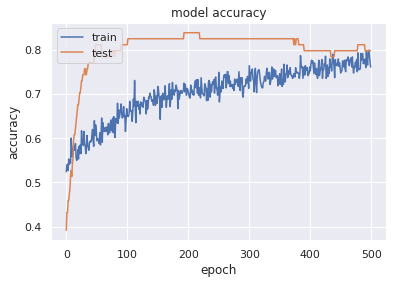

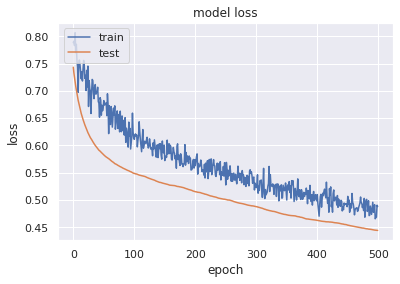

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
yhat_classes = mlpmodel.predict(X_test, verbose=0)
len(yhat_classes)

184

In [ ]:
pred_lst = []
for num in yhat_classes:
    if num >= 0.5:
        pred_lst.append(1)
    else:
        pred_lst.append(0)        

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('f1 score is ', f1_score(Y_test, pred_lst))
print('recall score is ', recall_score(Y_test, pred_lst))
print('precision score is ', precision_score(Y_test, pred_lst))

f1 score is  0.8656716417910447
recall score is  0.8529411764705882
precision score is  0.8787878787878788


In [ ]:
print('Total number of data with Heart Disease 1: {}'.format(Y_train[:].sum() + Y_test[:].sum()))
print('Total number of data without Heart Disease 0: {}'.format(df.shape[0] - (Y_train[:].sum() + Y_test[:].sum())))

Total number of data with Heart Disease 1: 508
Total number of data without Heart Disease 0: 410


##**Step 6.2: Machine Learning Model**

###**Step 6.2.1: Machine Learning Model (Logistic Regression)**

####**Step 6.2.1.1: Basic Logistic Regression with All Features**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, auc, roc_auc_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# PREDICTION -- CALCULATE ACCURACY
i = 0
for index, predicted in enumerate(list(logreg.predict(X_test[:]))):
    if predicted == Y_test.iloc[index]:
        i +=1
print('Accuracy: {}%'.format(i/len(Y_test)*100))

Accuracy: 85.86956521739131%


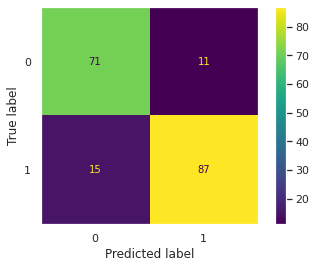

In [ ]:
# CONFUSION MATRIX - TP, FP, TN, FN
ConfusionMatrixDisplay.from_estimator(logreg, X_test, Y_test)
plt.grid(False)
plt.show()

In [ ]:
# CLASSIFICATION REPORT
print(classification_report(Y_test, list(logreg.predict(X_test[:])), target_names=['Low Heart Disease Risk', 'High Heart Disease Risk']))

                         precision    recall  f1-score   support

 Low Heart Disease Risk       0.83      0.87      0.85        82
High Heart Disease Risk       0.89      0.85      0.87       102

               accuracy                           0.86       184
              macro avg       0.86      0.86      0.86       184
           weighted avg       0.86      0.86      0.86       184



In [ ]:
# PRECISION RECALL GRAPH
precision, recall, thresholds = precision_recall_curve(Y_test, logreg.predict(X_test[:]))
logreg_f1 = f1_score(Y_test, list(logreg.predict(X_test[:])))
logreg_auc = auc(recall, precision)
print('Logistic: f1=%.3f auc=%.3f' % (logreg_f1, logreg_auc))

Logistic: f1=0.870 auc=0.911


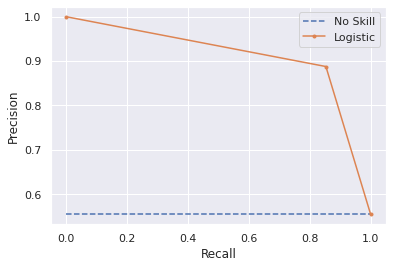

In [ ]:
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
# ROC AUC GRAPH
no_skill_prediction_prob = [0 for _ in range(len(Y_test))]
predicted_prob = logreg.predict_proba(X_test)[:, 1]
no_skill_prediction_auc = roc_auc_score(Y_test, no_skill_prediction_prob)
predicted_prob_auc = roc_auc_score(Y_test, logreg.predict_proba(X_test)[:, 1])

# Summarize score
print('No Skill: ROC AUC=%.3f' % (no_skill_prediction_auc))
print('Logistic: ROC AUC=%.3f' % (predicted_prob_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.934


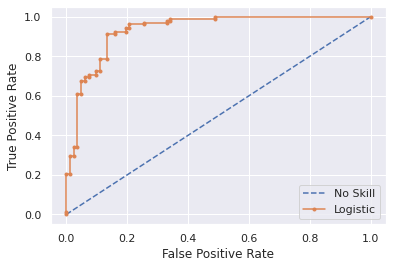

In [ ]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, no_skill_prediction_prob)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, logreg.predict_proba(X_test)[:, 1])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

####**Step 6.2.1.2: Logistic Regression with ANOVA f-test features selector**
<!-- https://machinelearningmastery.com/feature-selection-with-numerical-input-data/ -->

In [ ]:
# feature selection
def select_features(X_train, Y_train, X_test, k):
	# configure to select all features
    fs = SelectKBest(score_func=f_classif, k=k)
	# learn relationship from training data
    fs.fit(X_train, Y_train)
	# transform train input data
    X_train_fs = fs.transform(X_train)
	# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs, k, fs.get_support()

In [ ]:
for k_num in range(1, 21):
    X_train_fs, X_test_fs, fs, k, att_names = select_features(X_train, Y_train, X_test, k_num)
    anova_logreg = LogisticRegression()
    anova_logreg.fit(X_train_fs, Y_train)
    yhat = anova_logreg.predict(X_test_fs)
    accuracy = accuracy_score(Y_test, yhat)
    print('k value: {}'.format(k))
    print(att_names)
    print('Accuracy: %.2f' % (accuracy*100))

k value: 1
[False False False False False False False False False False False False
 False False False False False False  True False]
Accuracy: 83.15
k value: 2
[False False False False False False False False False False False False
 False False False False False  True  True False]
Accuracy: 83.15
k value: 3
[False False False False False False False  True False False False False
 False False False False False  True  True False]
Accuracy: 83.70
k value: 4
[False False False False False False False  True False False False False
 False False False  True False  True  True False]
Accuracy: 82.07
k value: 5
[False False False False False False False  True False False False False
 False False  True  True False  True  True False]
Accuracy: 82.07
k value: 6
[False False False False False False False  True  True False False False
 False False  True  True False  True  True False]
Accuracy: 85.87
k value: 7
[False False False False  True False False  True  True False False False
 False False  Tr

In [ ]:
def feature_selection_logreg(k_num):
    X_train_fs, X_test_fs, fs, k, att_names = select_features(X_train, Y_train, X_test, k_num)
    anova_logreg = sklearn.linear_model.LogisticRegression()
    anova_logreg.fit(X_train_fs, Y_train)
    yhat = anova_logreg.predict(X_test_fs)
    accuracy = accuracy_score(Y_test, yhat)
    print('k:', k)
    print('Coefficient:', anova_logreg.coef_)
    for key, v in enumerate(att_names):
        if v == True:
            print(X_train.columns[key])
    # CONFUSION MATRIX - TP, FP, TN, FN
    ConfusionMatrixDisplay.from_estimator(anova_logreg, X_test_fs, Y_test)
    plt.grid(False)
    plt.show()

    # CLASSIFICATION REPORT
    print("CLASSIFICATION REPORT: ")
    print(classification_report(Y_test, list(anova_logreg.predict(X_test_fs[:])), target_names=['Low Heart Disease Risk', 'High Heart Disease Risk']))

    # PRECISION RECALL GRAPH
    precision, recall, thresholds = precision_recall_curve(Y_test, anova_logreg.predict(X_test_fs[:]))
    anova_logreg_f1 = f1_score(Y_test, list(anova_logreg.predict(X_test_fs[:])))
    anova_logreg_auc = auc(recall, precision)
    print('Logistic Anova: f1=%.3f auc=%.3f' % (anova_logreg_f1, anova_logreg_auc))

    no_skill = len(Y_test[Y_test==1]) / len(Y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Logistic_Anova')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    # ROC AUC GRAPH
    no_skill_prediction_prob = [0 for _ in range(len(Y_test))]
    predicted_prob = anova_logreg.predict_proba(X_test_fs)[:, 1]
    no_skill_prediction_auc = roc_auc_score(Y_test, no_skill_prediction_prob)
    predicted_prob_auc = roc_auc_score(Y_test, anova_logreg.predict_proba(X_test_fs)[:, 1])

    # Summarize score
    print('No Skill: ROC AUC=%.3f' % (no_skill_prediction_auc))
    print('Logistic: ROC AUC=%.3f' % (predicted_prob_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, no_skill_prediction_prob)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, anova_logreg.predict_proba(X_test_fs)[:, 1])
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic_Anova')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print("=-"*50)

k: 9
Coefficient: [[-0.27578984  0.42520296 -1.44786969  1.61244735 -0.36674077 -0.38624154
   0.38626574  0.79628014 -1.35278958]]
MaxHR
Oldpeak
sex_F
chestpain_ASY
chestpain_ATA
exerciseagina_N
exerciseagina_Y
stslope_Flat
stslope_Up


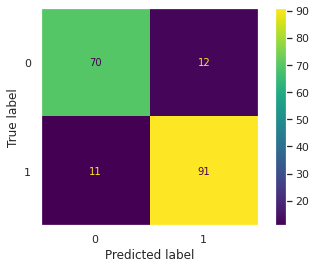

CLASSIFICATION REPORT: 
                         precision    recall  f1-score   support

 Low Heart Disease Risk       0.86      0.85      0.86        82
High Heart Disease Risk       0.88      0.89      0.89       102

               accuracy                           0.88       184
              macro avg       0.87      0.87      0.87       184
           weighted avg       0.87      0.88      0.87       184

Logistic Anova: f1=0.888 auc=0.918


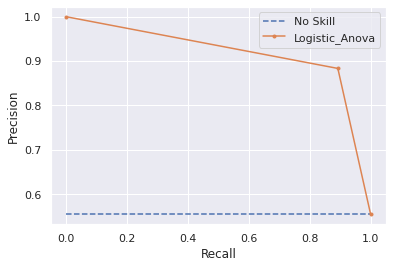

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.928


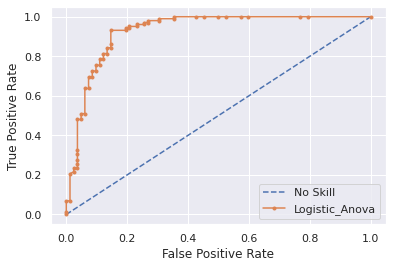

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
k: 10
Coefficient: [[-0.27473621  0.42763667 -0.75243508  0.75284911  1.61805083 -0.36188451
  -0.3848049   0.38521893  0.80462123 -1.35374771]]
MaxHR
Oldpeak
sex_F
sex_M
chestpain_ASY
chestpain_ATA
exerciseagina_N
exerciseagina_Y
stslope_Flat
stslope_Up


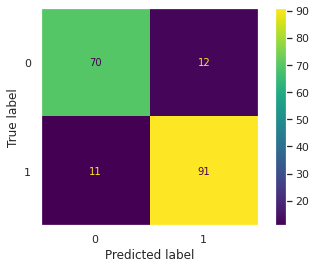

CLASSIFICATION REPORT: 
                         precision    recall  f1-score   support

 Low Heart Disease Risk       0.86      0.85      0.86        82
High Heart Disease Risk       0.88      0.89      0.89       102

               accuracy                           0.88       184
              macro avg       0.87      0.87      0.87       184
           weighted avg       0.87      0.88      0.87       184

Logistic Anova: f1=0.888 auc=0.918


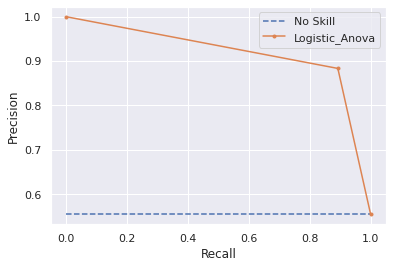

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.928


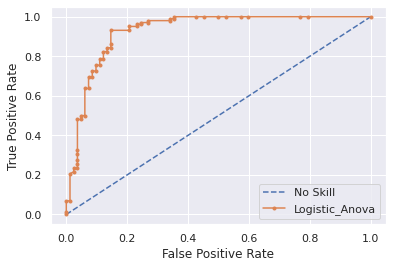

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


In [ ]:
for idx in [9, 10]:
    feature_selection_logreg(idx)

###**Step 6.2.2: Machine Learning Model (Naive Bayes)**

####**Step 6.2.2.1: Basic Naive Bayes with All Features**

In [ ]:
X_train_continuous = X_train[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
X_train_categorical = X_train[['sex_F', 'sex_M', 'chestpain_ASY', 'chestpain_ATA', 'chestpain_NAP', 'chestpain_TA', 'restecg_LVH', 'restecg_Normal', 'restecg_ST', 'exerciseagina_N',
       'exerciseagina_Y', 'stslope_Down', 'stslope_Flat', 'stslope_Up', 'FastingBS']]
Y_train_nb = Y_train.copy()

In [ ]:
X_test_continuous = X_test[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]
X_test_categorical = X_test[['sex_F', 'sex_M', 'chestpain_ASY', 'chestpain_ATA', 'chestpain_NAP', 'chestpain_TA', 'restecg_LVH', 'restecg_Normal', 'restecg_ST', 'exerciseagina_N',
       'exerciseagina_Y', 'stslope_Down', 'stslope_Flat', 'stslope_Up', 'FastingBS']]
Y_test_nb = Y_test.copy()

In [ ]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

gnb = GaussianNB()
gnb.fit(X_train_continuous, Y_train_nb)

cnb = CategoricalNB()
cnb.fit(X_train_categorical, Y_train_nb)

CategoricalNB()

In [ ]:
gnb_train_probas = gnb.predict_proba(X_train_continuous)
cnb_train_probas = cnb.predict_proba(X_train_categorical)
# And on testing data
gnb_test_probas = gnb.predict_proba(X_test_continuous)
cnb_test_probas = cnb.predict_proba(X_test_categorical)

In [ ]:
X_new_train = np.c_[(gnb_train_probas[:,1], cnb_train_probas[:,1])] # Train
X_new_test = np.c_[(gnb_test_probas[:,1], cnb_test_probas[:,1])] # Test

In [ ]:
model = GaussianNB()
clf = model.fit(X_new_train, Y_train_nb)
# Predict class labels on a test data
pred_labels = model.predict(X_new_test)
# ----- Print results -----
print('Classes: ', clf.classes_) # class labels known to the classifier
print('Class Priors: ',clf.class_prior_) # probability of each class.
score = model.score(X_new_test, Y_test_nb)
print('Accuracy Score: ', score)

Classes:  [0 1]
Class Priors:  [0.44686649 0.55313351]
Accuracy Score:  0.8586956521739131


In [ ]:
print(classification_report(Y_test_nb, list(model.predict(X_new_test[:])),  target_names=['Low Heart Disease Risk', 'High Heart Disease Risk']))

                         precision    recall  f1-score   support

 Low Heart Disease Risk       0.83      0.87      0.85        82
High Heart Disease Risk       0.89      0.85      0.87       102

               accuracy                           0.86       184
              macro avg       0.86      0.86      0.86       184
           weighted avg       0.86      0.86      0.86       184



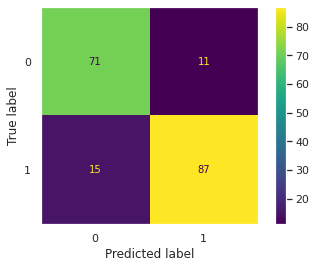

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_new_test, Y_test_nb)
plt.grid(False)
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test_nb, model.predict(X_new_test[:]))
model_f1 = f1_score(Y_test_nb, list(model.predict(X_new_test[:])))
model_auc = auc(recall, precision)
print('Naive Bayes: f1=%.3f auc=%.3f' % (model_f1, model_auc))

Naive Bayes: f1=0.870 auc=0.911


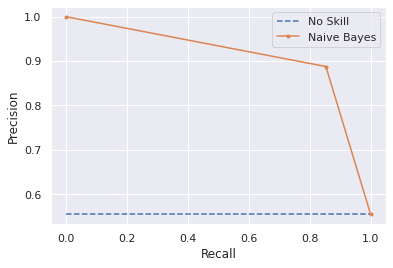

In [ ]:
no_skill = len(Y_test_nb[Y_test_nb==1]) / len(Y_test_nb)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

####**Step 6.2.2.2: Naive Bayes with ANOVA f-test features selector**

In [ ]:
for k_num in range(1, 21):
    cat_lst_ref = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    categorical_idx = []
    categorical_name = []
    others_name = []
    X_train_fs, X_test_fs, fs, k, att_names = select_features(X_train, Y_train, X_test, k_num)
    for key, v in enumerate(att_names):
        if v == True:
            if X_train.columns[key] not in cat_lst_ref:
                categorical_idx.append(key)
                categorical_name.append(X_train.columns[key])
            else:
                others_name.append(X_train.columns[key])
        else: None

    Y_train_nb = Y_train.copy()
    Y_test_nb = Y_test.copy()
    if(len(others_name)>0):
        X_train_continuous = X_train[others_name]
        X_test_continuous = X_test[others_name]
        gnb = GaussianNB()
        gnb.fit(X_train_continuous, Y_train_nb)
        gnb_train_probas = gnb.predict_proba(X_train_continuous)
        gnb_test_probas = gnb.predict_proba(X_test_continuous)
    if(len(categorical_name)>0):
        X_train_categorical = X_train[categorical_name]
        X_test_categorical = X_test[categorical_name]
        cnb = CategoricalNB()
        cnb.fit(X_train_categorical, Y_train_nb)
        cnb_train_probas = cnb.predict_proba(X_train_categorical)
        cnb_test_probas = cnb.predict_proba(X_test_categorical)
    
    X_new_train = np.c_[(gnb_train_probas[:,1], cnb_train_probas[:,1])] # Train
    X_new_test = np.c_[(gnb_test_probas[:,1], cnb_test_probas[:,1])] # Test
    
    model = GaussianNB()
    clf = model.fit(X_new_train, Y_train_nb)
    pred_labels = model.predict(X_new_test)
    print(k)
    score = model.score(X_new_test, Y_test_nb)
    print('Accuracy Score: ', score)
    print('=-'*50)

1
Accuracy Score:  0.8641304347826086
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
2
Accuracy Score:  0.8586956521739131
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
3
Accuracy Score:  0.8586956521739131
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
4
Accuracy Score:  0.842391304347826
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
5
Accuracy Score:  0.8315217391304348
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
6
Accuracy Score:  0.8315217391304348
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
7
Accuracy Score:  0.8478260869565217
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
8
Accuracy Score:  0.8369565

In [ ]:
def feature_select_nb(k_num):
    cat_lst_ref = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    categorical_idx = []
    categorical_name = []
    others_name = []
    X_train_fs, X_test_fs, fs, k, att_names = select_features(X_train, Y_train, X_test, k_num)
    for key, v in enumerate(att_names):
        if v == True:
            if X_train.columns[key] not in cat_lst_ref:
                categorical_idx.append(key)
                categorical_name.append(X_train.columns[key])
            else:
                others_name.append(X_train.columns[key])
        else: None

    Y_train_nb = Y_train.copy()
    Y_test_nb = Y_test.copy()
    if(len(others_name)>0):
        X_train_continuous = X_train[others_name]
        X_test_continuous = X_test[others_name]
        gnb = GaussianNB()
        gnb.fit(X_train_continuous, Y_train_nb)
        gnb_train_probas = gnb.predict_proba(X_train_continuous)
        gnb_test_probas = gnb.predict_proba(X_test_continuous)
    if(len(categorical_name)>0):
        X_train_categorical = X_train[categorical_name]
        X_test_categorical = X_test[categorical_name]
        cnb = CategoricalNB()
        cnb.fit(X_train_categorical, Y_train_nb)
        cnb_train_probas = cnb.predict_proba(X_train_categorical)
        cnb_test_probas = cnb.predict_proba(X_test_categorical)
        
    X_new_train = np.c_[(gnb_train_probas[:,1], cnb_train_probas[:,1])] # Train
    X_new_test = np.c_[(gnb_test_probas[:,1], cnb_test_probas[:,1])] # Test
        
    model = GaussianNB()
    clf = model.fit(X_new_train, Y_train_nb)
    pred_labels = model.predict(X_new_test)
    score = model.score(X_new_test, Y_test_nb)
    for keys, v in enumerate(att_names):
        if v == True:
            print(X_train.columns[keys])
    print('k: ', k)

    print('Accuracy Score: ', score)
    print('Classification Report', classification_report(Y_test_nb, list(model.predict(X_new_test[:])),  target_names=['Low Heart Disease Risk', 'High Heart Disease Risk']))
    ConfusionMatrixDisplay.from_estimator(model, X_new_test, Y_test_nb)
    plt.grid(False)
    plt.show()

    precision, recall, thresholds = precision_recall_curve(Y_test_nb, model.predict(X_new_test[:]))
    model_nb_f1 = f1_score(Y_test_nb, list(model.predict(X_new_test[:])))
    model_nb_auc = auc(recall, precision)
    print('Naive Bayes with Feature Selector: f1=%.3f auc=%.3f' % (model_nb_f1, model_nb_auc))

    no_skill = len(Y_test_nb[Y_test_nb==1]) / len(Y_test_nb)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(recall, precision, marker='.', label='Naive Bayes Anova')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print('=-'*50)

MaxHR
Oldpeak
sex_F
sex_M
chestpain_ASY
chestpain_ATA
exerciseagina_N
exerciseagina_Y
stslope_Flat
stslope_Up
FastingBS
k:  11
Accuracy Score:  0.875
Classification Report                          precision    recall  f1-score   support

 Low Heart Disease Risk       0.86      0.87      0.86        82
High Heart Disease Risk       0.89      0.88      0.89       102

               accuracy                           0.88       184
              macro avg       0.87      0.87      0.87       184
           weighted avg       0.88      0.88      0.88       184



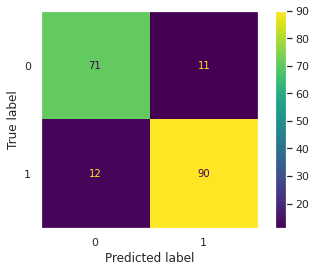

Naive Bayes with Feature Selector: f1=0.887 auc=0.919


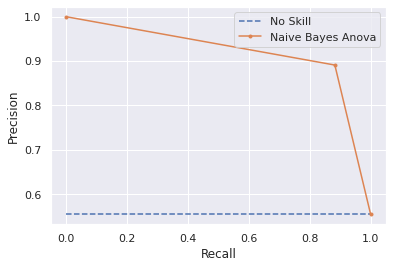

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Age
MaxHR
Oldpeak
sex_F
sex_M
chestpain_ASY
chestpain_ATA
exerciseagina_N
exerciseagina_Y
stslope_Flat
stslope_Up
FastingBS
k:  12
Accuracy Score:  0.875
Classification Report                          precision    recall  f1-score   support

 Low Heart Disease Risk       0.85      0.88      0.86        82
High Heart Disease Risk       0.90      0.87      0.89       102

               accuracy                           0.88       184
              macro avg       0.87      0.88      0.87       184
           weighted avg       0.88      0.88      0.88       184



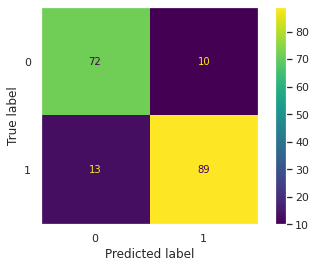

Naive Bayes with Feature Selector: f1=0.886 auc=0.921


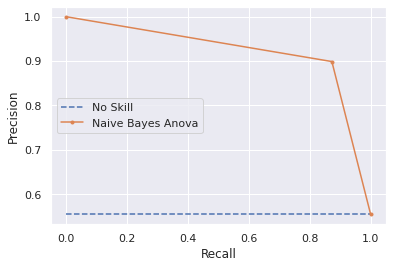

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Age
RestingBP
Cholesterol
MaxHR
Oldpeak
sex_F
sex_M
chestpain_ASY
chestpain_ATA
chestpain_NAP
exerciseagina_N
exerciseagina_Y
stslope_Down
stslope_Flat
stslope_Up
FastingBS
k:  16
Accuracy Score:  0.875
Classification Report                          precision    recall  f1-score   support

 Low Heart Disease Risk       0.86      0.87      0.86        82
High Heart Disease Risk       0.89      0.88      0.89       102

               accuracy                           0.88       184
              macro avg       0.87      0.87      0.87       184
           weighted avg       0.88      0.88      0.88       184



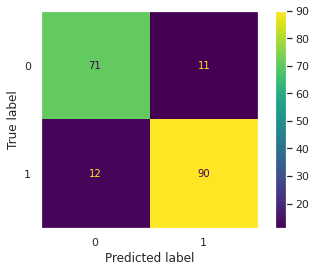

Naive Bayes with Feature Selector: f1=0.887 auc=0.919


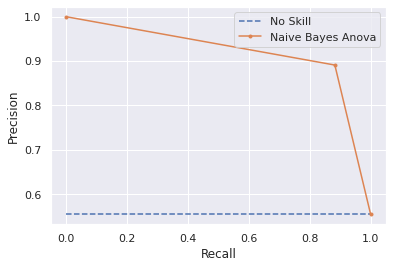

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Age
RestingBP
Cholesterol
MaxHR
Oldpeak
sex_F
sex_M
chestpain_ASY
chestpain_ATA
chestpain_NAP
restecg_ST
exerciseagina_N
exerciseagina_Y
stslope_Down
stslope_Flat
stslope_Up
FastingBS
k:  17
Accuracy Score:  0.875
Classification Report                          precision    recall  f1-score   support

 Low Heart Disease Risk       0.86      0.87      0.86        82
High Heart Disease Risk       0.89      0.88      0.89       102

               accuracy                           0.88       184
              macro avg       0.87      0.87      0.87       184
           weighted avg       0.88      0.88      0.88       184



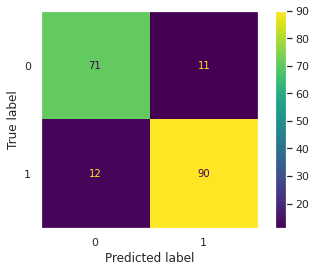

Naive Bayes with Feature Selector: f1=0.887 auc=0.919


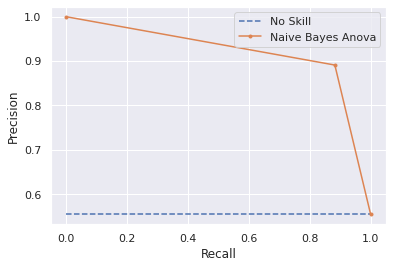

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


In [ ]:
for num in [11, 12, 16, 17]:
    feature_select_nb(num)